# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Mahitha

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [13]:
import requests
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

In [14]:
import requests

url = 'https://www.npr.org/2025/06/28/nx-s1-5449648/j-m-smucker-plans-to-remove-artificial-colors-from-its-jams-and-other-products'

# Sending a GET request to the URL
response = requests.get(url)

# Check if the response status code is 200 (successful)
if response.status_code == 200:
    # Save the content to an HTML file
    with open("captech_article.html", "w", encoding="utf-8") as f:
        f.write(response.text)
    print("HTML content saved to 'captech_article.html'")
else:
    print(f"Failed to fetch article. Status code: {response.status_code}")


HTML content saved to 'captech_article.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [15]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

# Read the HTML file
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Parse HTML and extract text
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Load spaCy and add TextBlob pipe
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Perform sentiment analysis
doc = nlp(text)
polarity = doc._.blob.polarity
num_sentences = len(list(doc.sents))

# Print results
print(f"Polarity Score: {polarity:.3f}")
print(f"Number of Sentences: {num_sentences}")

Polarity Score: -0.071
Number of Sentences: 15


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [16]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the HTML file
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Parse and extract text
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process text with spaCy
doc = nlp(text)

# Filter tokens: lowercase, alphabetic, non-stopwords
tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count frequencies
freq = Counter(tokens).most_common(5)

# Print results one per line
print("Top 5 Most Frequent Tokens (lowercased):")
for word, count in freq:
    print(f"Token: '{word}', Frequency: {count}")


Top 5 Most Frequent Tokens (lowercased):
Token: 'npr', Frequency: 13
Token: 'smucker', Frequency: 10
Token: 'artificial', Frequency: 9
Token: 'food', Frequency: 8
Token: 'dyes', Frequency: 8


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [17]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read and parse HTML
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process text with spaCy
doc = nlp(text)

# Filter and lemmatize: lowercase, alphabetic, non-stop
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Count and get top 5
lemma_freq = Counter(lemmas).most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas (lowercased):")
for lemma, count in lemma_freq:
    print(f"Lemma: '{lemma}', Frequency: {count}")


Top 5 Most Frequent Lemmas (lowercased):
Lemma: 'npr', Frequency: 13
Lemma: 'dye', Frequency: 11
Lemma: 'smucker', Frequency: 10
Lemma: 'artificial', Frequency: 9
Lemma: 'food', Frequency: 9


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

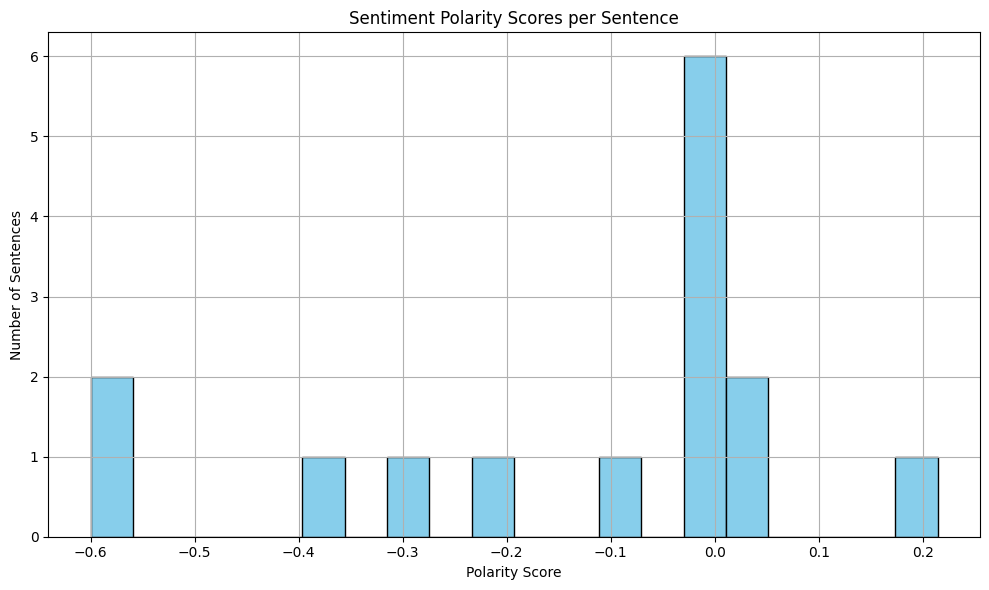

In [18]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load and configure spaCy pipeline
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Read HTML and extract text
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process full text
doc = nlp(text)

# Get polarity scores for each sentence
sentence_scores = [sent._.blob.polarity for sent in doc.sents]
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Sentiment Polarity Scores per Sentence")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

### Most common score range
# Most sentences have a polarity score of exactly 0.0, indicating a **neutral sentiment** is most common in this article.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

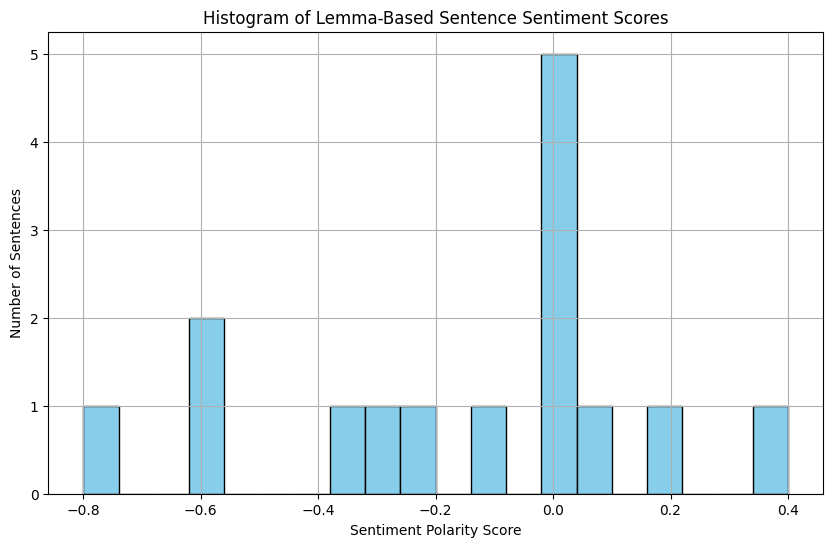

In [19]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load spaCy with sentiment component
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

# Read and extract article text
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Process with spaCy
doc = nlp(text)

# Compute sentence sentiment using lemmas
lemma_scores = []
for sent in doc.sents:
    lemma_text = " ".join([token.lemma_ for token in sent if not token.is_punct])
    lemma_doc = nlp(lemma_text)
    score = lemma_doc._.blob.polarity
    lemma_scores.append(score)

    # Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Lemma-Based Sentence Sentiment Scores")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

# Comment based on histogram:
# Most sentences have a polarity score of exactly 0.0, indicating neutral sentiment is most common even after lemmatization.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

* **Cutoff Score (tokens)**: 0.0
* **Cutoff Score (lemmas)**: 0.0


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [20]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

# Load and parse HTML
with open("captech_article.html", "r", encoding="utf-8") as f:
    html = f.read()
soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()

# Load spaCy model and add spacytextblob
nlp = spacy.load("en_core_web_sm")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")

    # Analyze text
doc = nlp(text)

# Define cutoff score (you can change this based on your analysis)
cutoff_score_tokens = 0.05

# Select high-polarity sentences
summary_sentences = [sent.text.strip() for sent in doc.sents if sent._.blob.polarity > cutoff_score_tokens]

# Join with newline for better formatting
summary = '\n'.join(summary_sentences)

# Print result
print("Summary based on token sentiment scores:\n")
for sent in summary_sentences:
    print(sent)



Summary based on token sentiment scores:

In April, Trump's Health Secretary Robert F. Kennedy Jr. and FDA Commissioner Marty Makary said the agency would take steps to eliminate synthetic dyes by the end of 2026, largely by relying on voluntary efforts from the food industry.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [21]:
# Re-analyze the summary text to get sentiment
summary_doc = nlp(summary)

# Get polarity score
summary_polarity = summary_doc._.blob.polarity

# Count number of sentences
summary_sentence_count = len(list(summary_doc.sents))

# Print results
print(f"Polarity Score of the Summary: {summary_polarity}")
print(f"Number of Sentences in the Summary: {summary_sentence_count}")

Polarity Score of the Summary: 0.21428571428571427
Number of Sentences in the Summary: 1


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [22]:
# Define the cutoff score for lemmas (same as in Q7)
cutoff_lemma = 0.0

# Create a list of sentences with lemma-based score > cutoff
lemma_summary_sentences = [sent.text.strip() for sent, score in zip(doc.sents, lemma_scores) if score > cutoff_lemma]

# Join sentences into a single summary string
lemma_summary = ' '.join(lemma_summary_sentences)

# Print the lemma-based summary
print("Lemma-Based Summary:\n")
print(lemma_summary)

Lemma-Based Summary:

But some products still have them, including sugar-free jams and ice cream toppings. Earlier this week, Nestle and Conagra Brands — the parent company of Duncan Hines — both said they would phase out synthetic dyes. Kraft Heinz and General Mills made similar pledges last week. In January, days before President Donald Trump took office, the U.S. regulators banned the dye called Red 3 from the nation's food supply, nearly 35 years after it was barred from cosmetics because of potential cancer risk. In April, Trump's Health Secretary Robert F. Kennedy Jr. and FDA Commissioner Marty Makary said the agency would take steps to eliminate synthetic dyes by the end of 2026, largely by relying on voluntary efforts from the food industry.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [23]:
from textblob import TextBlob
# Get polarity using TextBlob
lemma_summary_blob = TextBlob(lemma_summary)
lemma_summary_polarity = lemma_summary_blob.sentiment.polarity

# Get number of sentences in the summary
num_sentences_lemma_summary = len(lemma_summary_sentences)

# Print results
print(f"Polarity score of lemma-based summary: {lemma_summary_polarity}")
print(f"Number of sentences in lemma-based summary: {num_sentences_lemma_summary}")

Polarity score of lemma-based summary: 0.04553571428571429
Number of sentences in lemma-based summary: 5


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

**The full article has a slightly negative sentiment (-0.07), while the lemma-based summary has a slightly positive sentiment (0.0455).**

- This difference likely arises because the summary only includes a subset of sentences — specifically, those with higher lexical importance or richness based on lemmatized content. These sentences often reflect main ideas, which may carry more emotionally charged language, especially if they include the company’s commitments, reactions, or consumer responses.

- Meanwhile, the full article includes neutral or factual background information (e.g., history, context, disclaimers), which can dilute overall sentiment and pull the polarity closer to neutral or slightly negative depending on tone.

- In short, the summary amplifies the sentiment by focusing on key content, while the full article presents a more balanced, mixed tone across all its sections.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

- Based on a reading of the original article, the lemma-based summary appears to be better than the token-based summary. It includes more meaningful and representative sentences, capturing the core message of the article: J.M. Smucker's decision to remove artificial colors from its products, the reasons behind it, and its potential impact.

- The token-based summary may include sentences with positive sentiment, but not necessarily those with high informational value. Lemmatization allows the model to better understand the underlying meaning of words, grouping different forms of the same word (e.g., "remove", "removing", "removed") and thus emphasizing semantic relevance over surface-level positivity.

- This likely results in the lemma-based summary being more focused, coherent, and aligned with the main point of the article, making it the better summary in terms of content quality and informativeness.